# 线性回归模型

In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50


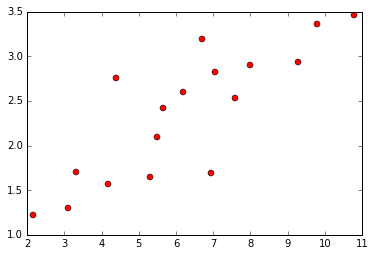

In [2]:
# Training Data
train_X = numpy.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = numpy.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
%matplotlib inline
plt.plot(train_X, train_Y, 'ro', label='Original data')


test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])


In [3]:
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model y = X * W + b
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y, 2)) / (n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.158117458 W= 0.271754 b= 0.628303
Epoch: 0100 cost= 0.157282472 W= 0.26895 b= 0.648739
Epoch: 0150 cost= 0.156631127 W= 0.266473 b= 0.666797
Epoch: 0200 cost= 0.156123057 W= 0.264283 b= 0.682752
Epoch: 0250 cost= 0.155726835 W= 0.262349 b= 0.69685
Epoch: 0300 cost= 0.155417845 W= 0.26064 b= 0.709306
Epoch: 0350 cost= 0.155176908 W= 0.25913 b= 0.720313
Epoch: 0400 cost= 0.154989094 W= 0.257796 b= 0.730037
Epoch: 0450 cost= 0.154842749 W= 0.256617 b= 0.73863
Epoch: 0500 cost= 0.154728740 W= 0.255575 b= 0.746222
Epoch: 0550 cost= 0.154639855 W= 0.254655 b= 0.75293
Epoch: 0600 cost= 0.154570699 W= 0.253842 b= 0.758857
Epoch: 0650 cost= 0.154516816 W= 0.253123 b= 0.764095
Epoch: 0700 cost= 0.154474899 W= 0.252488 b= 0.768722
Epoch: 0750 cost= 0.154442340 W= 0.251927 b= 0.77281
Epoch: 0800 cost= 0.154416963 W= 0.251432 b= 0.776423
Epoch: 0850 cost= 0.154397264 W= 0.250994 b= 0.779616
Epoch: 0900 cost= 0.154381961 W= 0.250607 b= 0.782435
Epoch: 0950 cost= 0.154370084 W= 0.

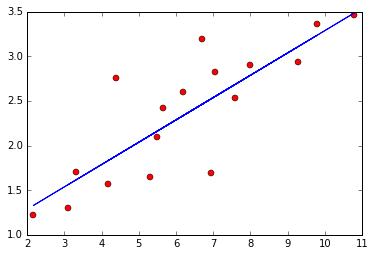

In [4]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(c), \
                  "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    %matplotlib inline
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    # Testing example, as requested (Issue #2)
    
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))